In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing

 **Getting data**

We have added some columns 
1. 'ph','organic matter(%)', 
2. 'Available Nitrogen(Kg./Ha.)',
3. 'Available Phosphorus(Kg./Ha.)', 
4. 'Available Potash(Kg./Ha.)',
5. 'TOTAL RAINFALL PER YEAR(mm)'

and some REMOVED columns later like STATE(only one unique value) and PRODUCTION (leaky data, not useful in real scenario as AREA/PRODUCTION = YIELD)

In [ ]:
dat = pd.read_csv('/content/drive/My Drive/Bihar_Yields_modified.csv')

In [ ]:
dat.info()
dat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14083 entries, 0 to 14082
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   STATE                          14083 non-null  object 
 1   DISTRICT                       14083 non-null  object 
 2   YEAR                           14083 non-null  int64  
 3   CROP                           14083 non-null  object 
 4   AREA                           12761 non-null  float64
 5   PRODUCTION                     14074 non-null  float64
 6   YIELD                          12219 non-null  float64
 7   SEASON                         14083 non-null  object 
 8   ph                             13063 non-null  float64
 9   organic matter(%)              13063 non-null  float64
 10  Available Nitrogen(Kg./Ha.)    13063 non-null  float64
 11  Available Phosphorus(Kg./Ha.)  13063 non-null  float64
 12  Available Potash(Kg./Ha.)      13063 non-null 

,STATE,DISTRICT,YEAR,CROP,AREA,PRODUCTION,YIELD,SEASON,ph,organic matter(%),Available Nitrogen(Kg./Ha.),Available Phosphorus(Kg./Ha.),Available Potash(Kg./Ha.),TOTAL RAINFALL PER YEAR(mm)
0,BIHAR,Araria,2005,HORSEGRAM,NaN,1590.0,NaN,KHARIF,7.15,0.6,225.0,22.5,200.0,1450.0
1,BIHAR,Araria,2007,MASOOR,NaN,1342.0,NaN,RABI,7.15,0.6,225.0,22.5,200.0,1450.0
2,BIHAR,Araria,2007,GRAM,1216.0,1172.0,0.96,RABI,7.15,0.6,225.0,22.5,200.0,1450.0
3,BIHAR,Araria,2005,MAIZE,24466.0,60615.0,2.48,TOTAL,7.15,0.6,225.0,22.5,200.0,1450.0
4,BIHAR,Araria,2006,MOONG,1097.0,553.0,0.50,KHARIF,7.15,0.6,225.0,22.5,200.0,1450.0


Removing duplicates and missing values

In [ ]:
dat.dropna(inplace=True)

In [ ]:
dat.drop_duplicates(inplace=True)

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11793 entries, 2 to 14082
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   STATE                          11793 non-null  object 
 1   DISTRICT                       11793 non-null  object 
 2   YEAR                           11793 non-null  int64  
 3   CROP                           11793 non-null  object 
 4   AREA                           11793 non-null  float64
 5   PRODUCTION                     11793 non-null  float64
 6   YIELD                          11793 non-null  float64
 7   SEASON                         11793 non-null  object 
 8   ph                             11793 non-null  float64
 9   organic matter(%)              11793 non-null  float64
 10  Available Nitrogen(Kg./Ha.)    11793 non-null  float64
 11  Available Phosphorus(Kg./Ha.)  11793 non-null  float64
 12  Available Potash(Kg./Ha.)      11793 non-null 

In [ ]:
# print(dat[dat.DISTRICT.eq('G')])
dat.CROP.value_counts()

MAIZE                    1561
RICE                      944
MOONG                     870
POTATO                    441
RAPESEED &MUSTARD         400
WHEAT                     398
ARHAR (TUR)               393
GRAM                      363
MASOOR                    353
ONION                     351
BARLEY                    343
KESARI                    341
PEAS & BEANS (PULSES)     337
SUGARCANE                 316
LINSEED                   313
SWEET POTATO              307
RAGI                      298
URAD                      295
DRY CHILLIES              287
SUNFLOWER                 277
SESAMUM                   274
GARLIC                    259
CORIANDER                 245
BANANA                    185
MESTA                     184
SMALL MILLETS             175
OTHER RABI PULSES         161
OTHER KHARIF PULSES       157
SANNHAMP                  144
TURMERIC                  141
HORSEGRAM                 123
TOBACCO                   112
JUTE                       93
JOWAR     

In [ ]:
#  ['STATE','PRODUCTION','ph','organic matter(%)', 'Available Nitrogen(Kg./Ha.)','Available Phosphorus(Kg./Ha.)', 'Available Potash(Kg./Ha.)','TOTAL RAINFALL PER YEAR(mm)']

**removing state as it is useless and Production as it is a leaky data**

In [ ]:
dat.drop(['STATE','PRODUCTION'],inplace=True, axis=1)

**removing some crop as its count is vert less**

In [ ]:
# 'RAGI','URAD','DRY CHILLIES','SUNFLOWER','SEASUM','GARLIC','CORIANDER','BANANA','MESTA','SMALL MILLETS',
l = ['OTHER RABI PULSES','OTHER KHARIF PULSES','JUTE','JOWAR','BAJRA','DRY GINGER','GROUNDNUT','SAFFLOWER','CASTOR SEED']
dat = dat[~dat.CROP.isin(l)]
dat.CROP.value_counts()

MAIZE                    1561
RICE                      944
MOONG                     870
POTATO                    441
RAPESEED &MUSTARD         400
WHEAT                     398
ARHAR (TUR)               393
GRAM                      363
MASOOR                    353
ONION                     351
BARLEY                    343
KESARI                    341
PEAS & BEANS (PULSES)     337
SUGARCANE                 316
LINSEED                   313
SWEET POTATO              307
RAGI                      298
URAD                      295
DRY CHILLIES              287
SUNFLOWER                 277
SESAMUM                   274
GARLIC                    259
CORIANDER                 245
BANANA                    185
MESTA                     184
SMALL MILLETS             175
SANNHAMP                  144
TURMERIC                  141
HORSEGRAM                 123
TOBACCO                   112
Name: CROP, dtype: int64

**removing outliners**

In [ ]:
data = dat[dat['YIELD']<=10]

In [ ]:
data = data[data['YIELD']>=0.5]

In [ ]:
data.describe()

,YEAR,AREA,YIELD,ph,organic matter(%),Available Nitrogen(Kg./Ha.),Available Phosphorus(Kg./Ha.),Available Potash(Kg./Ha.),TOTAL RAINFALL PER YEAR(mm)
count,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000
mean,2003.216874,8800.040305,1.819524,7.364190,0.659048,264.171975,37.223295,219.682573,1239.012217
std,3.117421,21939.015206,1.961963,0.116019,0.073288,30.350369,14.446066,24.429230,126.023133
min,1998.000000,1.000000,0.500000,7.150000,0.600000,225.000000,22.500000,200.000000,1115.000000
25%,2001.000000,107.000000,0.770000,7.400000,0.600000,250.000000,27.500000,200.000000,1115.000000
50%,2003.000000,695.000000,1.060000,7.400000,0.600000,250.000000,27.500000,200.000000,1245.000000
75%,2006.000000,4610.000000,1.820000,7.450000,0.750000,300.000000,55.000000,250.000000,1245.000000
max,2008.000000,191082.000000,10.000000,7.450000,0.750000,300.000000,55.000000,250.000000,1450.000000


In [ ]:
dat = data
# dat.CROP.value_counts()

In [ ]:
dat.head()

,DISTRICT,YEAR,CROP,AREA,YIELD,SEASON,ph,organic matter(%),Available Nitrogen(Kg./Ha.),Available Phosphorus(Kg./Ha.),Available Potash(Kg./Ha.),TOTAL RAINFALL PER YEAR(mm)
2,Araria,2007,GRAM,1216.0,0.96,RABI,7.15,0.6,225.0,22.5,200.0,1450.0
3,Araria,2005,MAIZE,24466.0,2.48,TOTAL,7.15,0.6,225.0,22.5,200.0,1450.0
4,Araria,2006,MOONG,1097.0,0.50,KHARIF,7.15,0.6,225.0,22.5,200.0,1450.0
5,Araria,2008,MAIZE,25343.0,3.94,TOTAL,7.15,0.6,225.0,22.5,200.0,1450.0
6,Araria,2008,MOONG,8381.0,0.55,TOTAL,7.15,0.6,225.0,22.5,200.0,1450.0


**Label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
dat['CROP'] = encoder.fit_transform(dat['CROP'])

enc2 = LabelEncoder()
dat['SEASON'] = enc2.fit_transform(dat['SEASON'])

enc3 = LabelEncoder()
dat['DISTRICT'] = enc3.fit_transform(dat['DISTRICT'])

In [ ]:
dat.head()

,DISTRICT,YEAR,CROP,AREA,YIELD,SEASON,ph,organic matter(%),Available Nitrogen(Kg./Ha.),Available Phosphorus(Kg./Ha.),Available Potash(Kg./Ha.),TOTAL RAINFALL PER YEAR(mm)
2,0,2007,6,1216.0,0.96,2,7.15,0.6,225.0,22.5,200.0,1450.0
3,0,2005,10,24466.0,2.48,4,7.15,0.6,225.0,22.5,200.0,1450.0
4,0,2006,13,1097.0,0.50,1,7.15,0.6,225.0,22.5,200.0,1450.0
5,0,2008,10,25343.0,3.94,4,7.15,0.6,225.0,22.5,200.0,1450.0
6,0,2008,13,8381.0,0.55,4,7.15,0.6,225.0,22.5,200.0,1450.0


**working on pycaret**

In [ ]:
!pip install pycaret

# Feature selection and Model Comparison

**Initially working with all the features**

In [ ]:
from pycaret.regression import *

In [ ]:
exp_reg = setup(dat, target = 'YIELD', normalize=True, numeric_features=['YEAR','organic matter(%)','SEASON','Available Potash(Kg./Ha.)'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1506
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(9577, 12)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
exp_reg

**MOdel comparison**

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.299200,0.328200,0.570300,0.915500,0.142400,0.178000
1,CatBoost Regressor,0.329300,0.331900,0.574500,0.914200,0.149100,0.210500
2,Random Forest,0.306300,0.352900,0.590900,0.909200,0.146600,0.182700
3,Light Gradient Boosting Machine,0.334000,0.361700,0.599100,0.906400,0.152000,0.210200
4,Gradient Boosting Regressor,0.431000,0.489500,0.697500,0.873200,0.187400,0.288400
5,Extreme Gradient Boosting,0.431200,0.491900,0.698800,0.872700,0.187600,0.288500
6,Decision Tree,0.380700,0.624400,0.787900,0.837000,0.191100,0.221500
7,AdaBoost Regressor,0.859300,1.267900,1.123400,0.670000,0.362200,0.773500
8,K Neighbors Regressor,0.712600,1.663600,1.287700,0.568900,0.348600,0.549700
9,Support Vector Machine,0.896700,3.244500,1.796500,0.163800,0.428000,0.436700


In [ ]:
rfr = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2654,0.2467,0.4967,0.9277,0.1294,0.1663
1,0.3030,0.3392,0.5824,0.9045,0.1469,0.1856
2,0.2971,0.2853,0.5342,0.9245,0.1413,0.1804
3,0.3194,0.3581,0.5984,0.9052,0.1544,0.1956
4,0.2991,0.3352,0.5790,0.9024,0.1440,0.1849
5,0.2931,0.3703,0.6085,0.8922,0.1487,0.1866
6,0.3361,0.4453,0.6673,0.8923,0.1510,0.1785
7,0.2833,0.2631,0.5129,0.9295,0.1370,0.1831
8,0.3478,0.4823,0.6945,0.9057,0.1648,0.1926
9,0.3191,0.4039,0.6355,0.9079,0.1487,0.1729


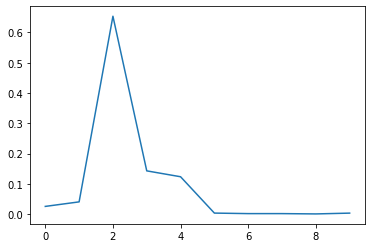

In [ ]:
plt.plot(rfr.feature_importances_)

From the above plot we can see that from feature 5 to 9 are not much important and they are 
1. 'ph',
2. 'organic matter(%)', 
3. 'Available Nitrogen(Kg./Ha.)',
4. 'Available Phosphorus(Kg./Ha.)', 
5. 'Available Potash(Kg./Ha.)',
6. 'TOTAL RAINFALL PER YEAR(mm)'

so removing them

In [ ]:
x = dat.drop(['ph','organic matter(%)', 'Available Nitrogen(Kg./Ha.)','Available Phosphorus(Kg./Ha.)', 'Available Potash(Kg./Ha.)','TOTAL RAINFALL PER YEAR(mm)'],axis=1)

# demo


In [ ]:
x.head()

,DISTRICT,YEAR,CROP,AREA,YIELD,SEASON
2,0,2007,6,1216.0,0.96,2
3,0,2005,10,24466.0,2.48,4
4,0,2006,13,1097.0,0.50,1
5,0,2008,10,25343.0,3.94,4
6,0,2008,13,8381.0,0.55,4


In [ ]:
z = setup(x, target = 'YIELD', normalize=True, numeric_features=['YEAR','SEASON'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1967
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(9577, 6)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.328600,0.315800,0.560800,0.917100,0.150400,0.214500
1,Extra Trees Regressor,0.305700,0.321300,0.564800,0.916000,0.146000,0.186100
2,Random Forest,0.308900,0.339100,0.581000,0.910700,0.150400,0.190600
3,Light Gradient Boosting Machine,0.335400,0.361900,0.599500,0.905700,0.154900,0.216600
4,Gradient Boosting Regressor,0.429900,0.482100,0.693100,0.873900,0.187900,0.291200
5,Extreme Gradient Boosting,0.433700,0.492900,0.701000,0.871300,0.189300,0.294200
6,Decision Tree,0.384600,0.559900,0.745600,0.852100,0.191700,0.229600
7,AdaBoost Regressor,0.828200,1.215000,1.100500,0.682900,0.348300,0.727500
8,K Neighbors Regressor,0.665200,1.555100,1.243600,0.593300,0.333000,0.497400
9,Support Vector Machine,0.819200,2.636500,1.619100,0.317200,0.422100,0.479800


In [ ]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3438,0.3775,0.6144,0.9079,0.1603,0.2187
1,0.3620,0.3430,0.5857,0.9264,0.1544,0.2160
2,0.3119,0.2777,0.5270,0.9026,0.1500,0.2076
3,0.3119,0.2362,0.4860,0.9449,0.1375,0.2123
4,0.3255,0.3136,0.5600,0.9080,0.1548,0.2215
5,0.3206,0.3229,0.5683,0.9171,0.1559,0.2154
6,0.3375,0.3198,0.5655,0.9209,0.1497,0.2096
7,0.3238,0.3538,0.5948,0.9085,0.1500,0.2158
8,0.3345,0.3415,0.5844,0.9090,0.1479,0.2194
9,0.3141,0.2721,0.5216,0.9261,0.1434,0.2086


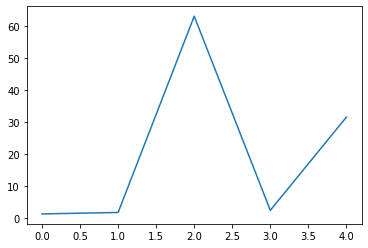

In [ ]:
plt.plot(cb.feature_importances_)

In [ ]:
rfr2 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3253,0.3691,0.6075,0.9099,0.1566,0.1972
1,0.3504,0.3720,0.6100,0.9202,0.1579,0.1938
2,0.3081,0.3084,0.5553,0.8919,0.1560,0.2037
3,0.2836,0.2427,0.4927,0.9434,0.1277,0.1734
4,0.3051,0.3637,0.6031,0.8933,0.1575,0.1979
5,0.2941,0.3060,0.5531,0.9214,0.1516,0.1893
6,0.3227,0.3974,0.6304,0.9017,0.1566,0.1867
7,0.2844,0.3221,0.5676,0.9167,0.1448,0.1851
8,0.3035,0.3262,0.5711,0.9130,0.1455,0.1909
9,0.3119,0.3838,0.6195,0.8957,0.1496,0.1884


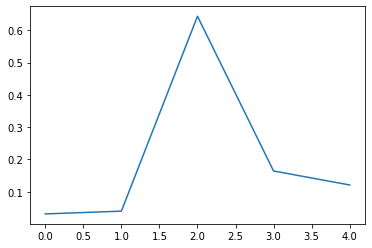

In [ ]:
plt.plot(rfr2.feature_importances_)

Again we see that :
1. District and Year are not much important feature

so removing them

In [ ]:
y = x.drop(['YEAR','DISTRICT'], axis=1)

In [ ]:
exp3 = setup(y, target = 'YIELD', normalize=True, numeric_features=['SEASON'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3614
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(9577, 4)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.353300,0.382800,0.617600,0.900100,0.162400,0.222400
1,Light Gradient Boosting Machine,0.366300,0.436000,0.658700,0.886700,0.167300,0.228000
2,K Neighbors Regressor,0.373700,0.453900,0.671900,0.881900,0.174900,0.230400
3,Gradient Boosting Regressor,0.429600,0.504800,0.708700,0.868500,0.190800,0.288600
4,Random Forest,0.395600,0.514800,0.716400,0.865800,0.186800,0.242500
5,Extreme Gradient Boosting,0.434400,0.516800,0.716400,0.865300,0.192500,0.291600
6,Extra Trees Regressor,0.423500,0.597900,0.772700,0.844000,0.201100,0.257500
7,Decision Tree,0.459400,0.711200,0.842100,0.814600,0.219200,0.276600
8,AdaBoost Regressor,0.924300,1.481300,1.215200,0.614900,0.395800,0.878400
9,Support Vector Machine,0.771600,2.439700,1.558500,0.366300,0.409800,0.464100


In [ ]:
cb1 = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3416,0.3649,0.6041,0.9017,0.1666,0.2224
1,0.3464,0.3479,0.5898,0.9147,0.1569,0.2145
2,0.3618,0.3987,0.6315,0.9008,0.1613,0.2192
3,0.3473,0.3196,0.5653,0.9145,0.1566,0.2227
4,0.3632,0.4215,0.6493,0.8841,0.1699,0.2207
5,0.3514,0.3872,0.6222,0.8946,0.1652,0.2315
6,0.3605,0.3901,0.6246,0.8816,0.1662,0.2325
7,0.3848,0.4915,0.7011,0.8864,0.1658,0.2180
8,0.3463,0.3513,0.5927,0.9082,0.1618,0.2297
9,0.3300,0.3548,0.5956,0.9145,0.1538,0.2127


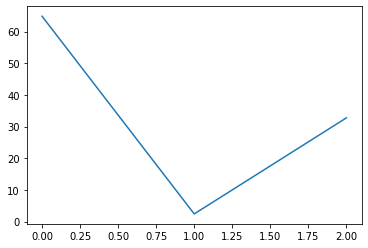

In [ ]:
plt.plot(cb1.feature_importances_)

**In this part I observe one special thing if I one hot encode the categorical feature then even a linear model gives good result from above results I thought that that the dataset is non linear but now it seems to be linear**

In [ ]:
exp4 = setup(y, target = 'YIELD', normalize=True, categorical_features=['SEASON','CROP'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5671
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(9577, 4)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.353500,0.394600,0.626400,0.896800,0.162600,0.219100
1,Support Vector Machine,0.350200,0.408500,0.637500,0.893300,0.164100,0.212900
2,Gradient Boosting Regressor,0.399200,0.426400,0.651500,0.888600,0.174900,0.266000
3,Extreme Gradient Boosting,0.401000,0.427000,0.652200,0.888400,0.175300,0.267600
4,Light Gradient Boosting Machine,0.365300,0.430300,0.654500,0.887600,0.167300,0.224500
5,K Neighbors Regressor,0.371400,0.441900,0.663300,0.884500,0.172100,0.228000
6,Bayesian Ridge,0.395300,0.477300,0.687900,0.875300,0.182700,0.251300
7,Ridge Regression,0.396200,0.478100,0.688700,0.875100,0.183300,0.252200
8,Huber Regressor,0.381900,0.510100,0.710200,0.866300,0.183500,0.224700
9,Random Forest,0.404200,0.533100,0.728600,0.860800,0.186200,0.243000


In [ ]:
cb2 = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3399,0.3734,0.6111,0.8870,0.1569,0.2214
1,0.3737,0.4795,0.6925,0.8760,0.1718,0.2207
2,0.3490,0.3944,0.6280,0.8962,0.1675,0.2278
3,0.3502,0.4051,0.6365,0.9107,0.1587,0.2136
4,0.3687,0.4279,0.6542,0.8963,0.1584,0.2038
5,0.3443,0.3666,0.6054,0.8777,0.1655,0.2311
6,0.3605,0.3784,0.6151,0.9049,0.1705,0.2327
7,0.3229,0.2955,0.5436,0.9278,0.1473,0.2001
8,0.3385,0.3267,0.5716,0.9188,0.1530,0.2069
9,0.3879,0.4987,0.7062,0.8726,0.1768,0.2331


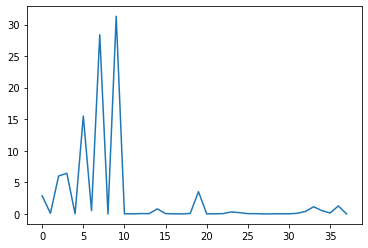

In [ ]:
plt.plot(cb2.feature_importances_)

# Not important

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
model1 = pickle.load(open('model.pkl','rb'))

In [ ]:
model1.predict(x_test)

array([2.7313, 0.616 , 0.9067, ..., 2.594 , 1.1053, 0.8726])

In [ ]:
model1.predict([[ 0.9984169 , -1.63957958, -0.3209499 ,  0.72041944, -0.31084395]])

array([2.7313])

In [ ]:
model1.predict([[0,2007,9,1216.0,2]])

array([1.1729])

In [ ]:
def convert(list):
  dict={}
  i=0
  for item in list:
    dict[item] = i
    i+=1
  return dict

In [ ]:
d = convert(l1)

In [ ]:
l1

array(['ARHAR (TUR)', 'BAJRA', 'BANANA', 'BARLEY', 'CASTOR SEED',
       'CORIANDER', 'DRY CHILLIES', 'DRY GINGER', 'GARLIC', 'GRAM',
       'GROUNDNUT', 'HORSEGRAM', 'JOWAR', 'JUTE', 'KESARI', 'LINSEED',
       'MAIZE', 'MASOOR', 'MESTA', 'MOONG', 'ONION',
       'OTHER KHARIF PULSES', 'OTHER RABI PULSES',
       'PEAS & BEANS (PULSES)', 'POTATO', 'RAGI', 'RAPESEED &MUSTARD',
       'RICE', 'SAFFLOWER', 'SANNHAMP', 'SESAMUM', 'SMALL MILLETS',
       'SUGARCANE', 'SUNFLOWER', 'SWEET POTATO', 'TOBACCO', 'TURMERIC',
       'URAD', 'WHEAT'], dtype=object)

In [ ]:
d['GARLIC']

8

In [ ]:
l2

array(['AUTUMN', 'KHARIF', 'RABI', 'SUMMER', 'TOTAL ', 'WHOLE YEAR',
       'WINTER'], dtype=object)

In [ ]:
l3

array(['Araria', 'Arhasia', 'Arval', 'Aurangabad', 'Banka', 'Begusarai',
       'Bhagalpur', 'Bhanka', 'Bhojpur', 'Buxar', 'Darbhanga', 'Devghar',
       'Dumka', 'Gadhwa', 'Gaya', 'Giridih', 'Godda', 'Gopalganj',
       'Gumala', 'Hazaribagh', 'Jamui', 'Jehanabad', 'Kaimur (Bhabua)',
       'Katihar', 'Khagaria', 'Kishanganj', 'Lakhisarai', 'Lohardanga',
       'Madhepura', 'Madhubani', 'Munger', 'Muzaffarpur', 'Nalanda',
       'Nawada', 'Palamau', 'Pashchim Champaran', 'Patna',
       'Purba Champaran', 'Purnia', 'Ranchi', 'Rohtas', 'Saharsa',
       'Sahebganj', 'Samastipur', 'Saran', 'Sheikhpura', 'Sheohar',
       'Singhbhum', 'Singhbhur(west)', 'Sitamarhi', 'Siwan', 'Sumal',
       'Supaul', 'Vaishali', 'Zamui'], dtype=object)

In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(20,input_dim=11,activation='relu'))

model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Dense(1,activation='linear'))

model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=100,verbose=1)




Epoch 1/100





8220/8220 [==============================] - 1s 75us/step - loss: 4.0698 - acc: 0.0085
Epoch 2/100
8220/8220 [==============================] - 0s 40us/step - loss: 3.4610 - acc: 0.0107
Epoch 3/100
8220/8220 [==============================] - 0s 40us/step - loss: 3.2747 - acc: 0.0113
Epoch 4/100
8220/8220 [==============================] - 0s 38us/step - loss: 3.0763 - acc: 0.0118
Epoch 5/100
8220/8220 [==============================] - 0s 42us/step - loss: 2.8038 - acc: 0.0137
Epoch 6/100
8220/8220 [==============================] - 0s 40us/step - loss: 2.6202 - acc: 0.0157
Epoch 7/100
8220/8220 [==============================] - 0s 41us/step - loss: 2.4054 - acc: 0.0185
Epoch 8/100
8220/8220 [==============================] - 0s 39us/step - loss: 2.2607 - acc: 0.0196
Epoch 9/100
8220/8220 [==============================] - 0s 39us/step - loss: 2.2043 - acc: 0.0206
Epoch 10/100
8220/8220 [==============================] - 0s 40us/step - loss: 2.1237 - acc: 0.0209
E

In [ ]:
ypred = model.predict(x_test)

In [ ]:
ypred

array([[1.5452002],
       [1.317669 ],
       [1.2825612],
       ...,
       [1.3624171],
       [1.1723638],
       [7.6302958]], dtype=float32)

In [ ]:
y_test

7336    1.33
8412    0.76
714     1.33
8205    0.68
4682    0.68
        ... 
6083    1.29
4324    1.46
8569    1.56
2350    0.61
8126    8.51
Name: YIELD, Length: 2056, dtype: float64

In [ ]:
score = model.evaluate(x_test,y_test,verbose=1)

2056/2056 [==============================] - 0s 43us/step


In [ ]:
score

[1.0109324749805584, 0.025778210116731516]

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []

In [ ]:
# for train, test in kfold.split(X, Y):
#   # create model
model = Sequential()
model.add(Dense(20, input_dim=11, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	# cvscores.append(scores[1] * 100)
# print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

acc: 2.29%


In [ ]:
from keras.wrapper.scikit_learn import Keras